In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import main
from model import *
import triplefinder as tf
import pickle
import getimage

In [15]:
import text


In [16]:
captions=tf.get_all_captions()
len(captions)

82612

In [17]:
#idf, vocab_dict = text.save_idf(captions)
with open('vocab.dict','rb') as f:
    vocab_dict=pickle.load(f)
    f.close()
idf=np.load('idf.npy')

In [18]:
type(idf)

numpy.ndarray

In [19]:
#np.save("idf.npy",idf)

In [20]:
type(vocab_dict)

dict

In [21]:

# f=open('vocab.dict','wb')
# pickle.dump(vocab_dict,f)
# f.close()

In [22]:
print(len(idf))

24756


In [23]:
print(len(vocab_dict))

24756


In [24]:
text.se_text("car",idf,vocab_dict)

array([ 0.08321891, -0.01475585,  0.2555118 ,  0.00820531,  0.02562971,
        0.08869005, -0.21340062, -0.03945328,  0.03369244, -0.05192958,
        0.03594896, -0.12440342, -0.2842549 ,  0.02983559,  0.13053422,
       -0.01081017, -0.11477351,  0.24059051, -0.11874729, -0.30629656,
        0.10177716,  0.04390349, -0.2114111 ,  0.14195818,  0.01654867,
       -0.29352185, -0.11256063,  0.11033028,  0.19565213,  0.02811834,
        0.4429092 ,  0.04337122, -0.04679874,  0.05727332,  0.22540747,
        0.0410955 ,  0.10726749, -0.02345522, -0.02310095,  0.04781444,
       -0.02062977,  0.02362974,  0.01296773, -0.10811564,  0.07935682,
       -0.05291037, -0.03818978, -0.09782433,  0.19505876, -0.06386486],
      dtype=float32)

In [27]:
model1=Model(512,50)


In [28]:
optim = Adam(model1.parameters, learning_rate=1e-4)

<IPython.core.display.Javascript object>


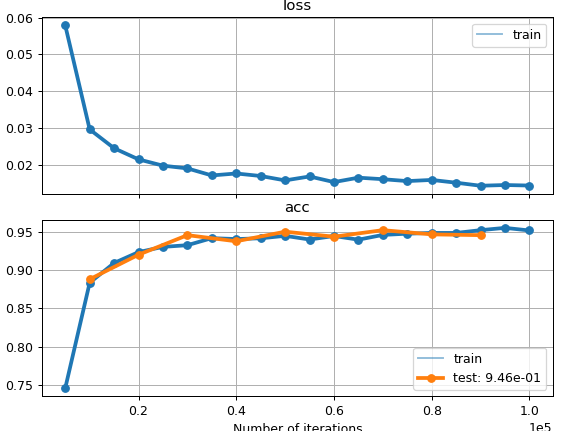

In [29]:
%matplotlib notebook
from noggin import create_plot
plotter, fig, ax = create_plot(metrics=["loss","acc"], last_n_batches=100000)

In [ ]:
# good_img, caption, bad_img = tf.get_triple()
# np.linalg.norm(text.se_text(caption,idf,vocab_dict))
# sim_to_good=sim(text.se_text(caption,idf,vocab_dict),model1(good_img))
# type(sim_to_good)


In [30]:
test_freq=10000
test_amt=2000
plot_freq=5000
for epoch_cnt in range(100000):
    good_img, caption, bad_img = tf.get_triple(tf.train_id)
    loss,acc = train(model1, text.se_text(caption, idf, vocab_dict), good_img, bad_img, optim) 
    plotter.set_train_batch({"loss" : loss,"acc" : acc},batch_size=1, plot=False)
    if (epoch_cnt+1) % plot_freq==0:
        plotter.set_train_epoch()
    if (epoch_cnt+1) % test_freq ==0:
        for i in range(test_amt):
            good_img, caption, bad_img = tf.get_triple(tf.test_id)
            acc=test(model1,  text.se_text(caption, idf, vocab_dict), good_img, bad_img)
            plotter.set_test_batch({"acc" : acc},batch_size=1)
        plotter.set_test_epoch()
            
    
        

In [31]:
save(model1)

In [32]:
model1=load()

In [ ]:
model1

In [ ]:
p = dict({4:5})

In [ ]:
len(p)

In [56]:

ids = getimage.get_image('burger', idf, vocab_dict, model1, tf.data)

In [57]:
print('\n'.join(list(tf.imageid_to_url[i] for i in ids)))

http://images.cocodataset.org/train2014/COCO_train2014_000000457843.jpg
http://images.cocodataset.org/train2014/COCO_train2014_000000028981.jpg
http://images.cocodataset.org/train2014/COCO_train2014_000000522465.jpg
http://images.cocodataset.org/train2014/COCO_train2014_000000312433.jpg
